# 🧠🤖 O Neurônio de McCulloch-Pitts 

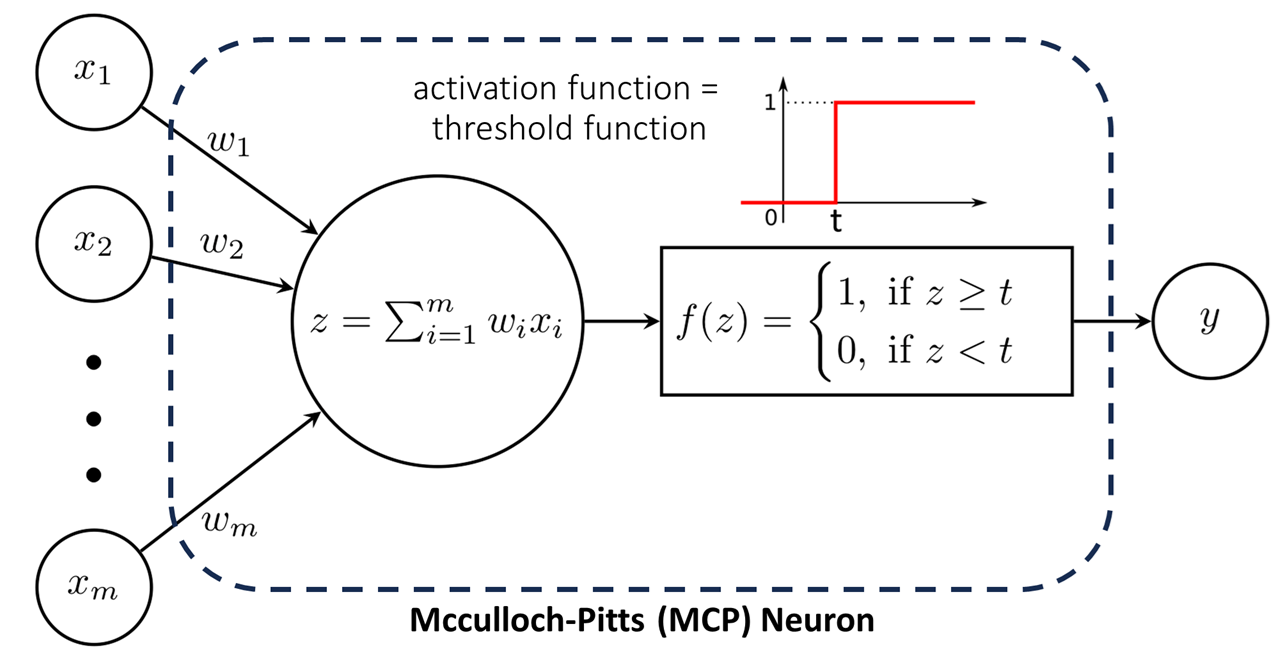

Figura 1: Neurônio de McCulloch-Pitts 


## Definição

O neurônio de **McCulloch-Pitts (MCP)** (McCulloch and Pitts, 1943) foi o primeiro modelo matematico-computacional do neurônio biológico. 

Como ilustrado na Figura 1:

- Ele recebe $m$ valores de **entrada**, $\left[ x_1, x_2, ..., x_m \right]$ representando pulsos elétricos. 
- Estes sinais são multiplicados por $m$ **pesos**, $\left[ w_1, w_2, ..., w_m \right]$, que simulam a resistência elétrica das sinapses e modificam a quantidade do sinal que atualmente chega ao corpo do neurônio. 
- Se a soma ponderada das entradas for maior que um **limiar**, diz-se que o neurônio se ativou e a saída é definida como $1$. Caso contrário, a saída é definida como $0$.
- A função de limiar que gera a saída do neurônio a partir da soma ponderada das entradas é uma **função de ativação**. Como veremos ao longo do curso, existem outros tipos de função de ativação.
- Originalmente, os valores de entrada eram binários (0 ou 1) e os valores dos pesos eram -1 (sinapses inibitórias), 0 ou 1 (sinapses excitatórias).

**Importante**: O **limiar de ativação** é tipicamente chamado de **bias** e representado pela letra $b$. Vamos adotar esta notação deste ponto em diante.

Matematicamente, a operação realizada pelo neurônio MCP pode ser escrita como: 

$$
y(x_1, \dots, x_d) =
\begin{cases}
1,\text{ se } \sum_{i=1}^{m} w_i x_i >= b \\
0, \text{ caso contrário}
\end{cases}
$$


## Nomeclatura


Na área de Redes Neurais, é comum o uso de nomes diferentes para as mesmas coisas. 

**Neurônios artificiais**, por exemplo, também são chamados de:

- **Unidade (unit)**.
- **Nó (node)**.
- **Célula (cell)** – mais comum em redes recorrentes.
- **Unidade de processamento (processing unit)**.


## Atividades

### Atividade 1: Implementação do Neurônio de McCulloch-Pitts (MCP)

Implemente o construtor e o método forward na célula abaixo. 

- O construtor deve armazenar os pesos (lista de floats) e o bias (float) como atributos privados da classe.
- A função forward deve receber um vetor de entrada x (lista de floats) e retornar o valor de saída do neurônio (float, 0 ou 1). Adicione um assert para verificar se o tamanho da entrada é igual o tamanho da lista de pesos.

**Importante**: mesmo se você já conhece a biblioteca numpy, utilize listas do python neste exercício.

In [ ]:
# resposta:

class MCPNeuron:
    """McCulloch-Pitts Neuron model

    Simulates a biologic neuron using a set of weights and
    an activation threshold.
    """

    def __init__(self, weights: list[float], bias: float):
        self.weights = weights
        self.bias = bias

    def forward(self, x: list[float]):
        assert len(x) == len(self.weights), "Input size must match weights size"
        weighted_sum = sum(
            x_i * w_i
            for x_i, w_i in zip(x, self.weights)
        )
        return 1 if weighted_sum >= self.bias else 0

In [ ]:
neuron = MCPNeuron(weights=[0.25, 0.5], bias=1)
neuron.forward([4, 0])  # resultado esperado = 1

### Atividade 2: Neurônios MCP como Operadores Lógicos

Código de preparação da atividade (não é necessário modificar).

In [ ]:
import pandas as pd


def unary_truth_table(neuron: MCPNeuron):
    table = []
    for a in [0, 1]:
        table.append([a, neuron.forward([a])])
    return pd.DataFrame(table, columns='a result'.split())

def binary_truth_table(neuron: MCPNeuron):
    table = []
    for a in [0, 1]:
        for b in [0, 1]:
            table.append([a, b, neuron.forward([a, b])])
    return pd.DataFrame(table, columns='a b result'.split())



#### Atividade 2.1: Operador lógico AND

Crie um neurônio cujos pesos e bias implementem a função AND.

In [ ]:
# resposta:
neuron_and = MCPNeuron(weights=[1, 1], bias=2)


In [ ]:

# print the truth table for the logical operator AND
binary_truth_table(neuron_and)

#### Atividade 2.2: Operador lógico OR

Crie um neurônio cujos pesos e bias implementem a função OR.

In [ ]:
# resposta:
neuron_or = MCPNeuron(weights=[1,1], bias=1)

In [ ]:
# print the truth table for the logical operator OR
binary_truth_table(neuron_or)

#### Atividade 2.3: Operador lógico NOT

Crie um neurônio cujos pesos e bias implementem a função NOT.

In [ ]:
# resposta:
neuron_not = MCPNeuron(weights=[-1], bias=0)  # TODO

In [ ]:
# print the truth table for the logical operator NOT
unary_truth_table(neuron_not)

#### Operador Lógico XOR

Tente criar um neurônio cujos pesos e bias implementem a função XOR.

In [ ]:
# resposta:


#### Atividade 2.4: Operador And com n entradas

Use herança criar uma classe que herde de MCPNeuron e implemente a função And com n entradas.

In [ ]:
# resposta:

class GenericAnd(MCPNeuron):
    def __init__(self, n):
        weights = [1.0] * n
        bias = len(weights)
        super().__init__(weights=weights, bias=bias)

In [ ]:
n = 5
generic_and = GenericAnd(n)
generic_and.forward([1, 1, 1, 1, 0])  # esperado: 0

## Atividade: Implementando Circuitos 

Nesta atividade, vamos construir a nossa primeira **Rede Neural**, isto é, um conjunto de neurônios conectados que realizam uma ou mais tarefas.

Considere o circuito exibido na Figura 1. O objetivo desta atividade é implementar este circuito utilizando apenas neurônios MCP. 

Crie uma classe **MCPCircuit** para representar o circuito. A classe deve possuir os seguintes métodos: 
- **construtor**: deve inicializar atributos privados do tipo MCPNeuron para representar as portas lógicas. 
- **forward**: deve receber uma lista contendo os valores de A, B, C e D, nesta ordem, e retornar a saída do circuito. 
  - Adicione um *assert* para verificar se a entrada possui tamanho 4.
  - Os valores de A e B devem ser usados como entrada para o neurônio AND e o valor de C deve ser usado como entrada para o neurônio NOT. As saídas destes neurônios devem ser usadas como entrada para o neurônio OR. E assim por diante.
  - Lembre-se de utilizar *type hints* para informar os tipos de entrada e saída dos métodos.


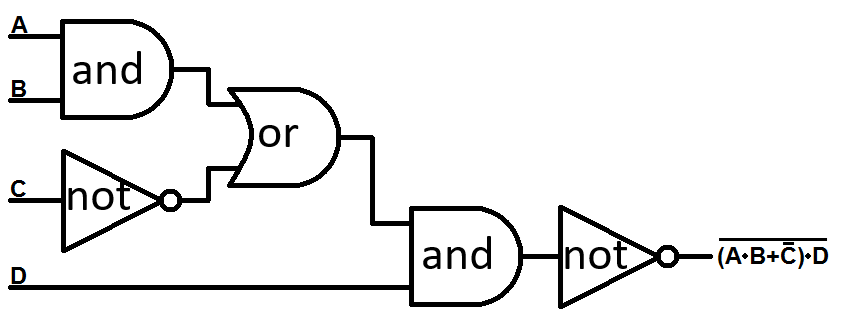

Figura 1: Circuito lógico.

In [ ]:

# resposta:

class MCPCircuit:
    def __init__(self):
        self._neuron_and = MCPNeuron(weights= [1, 1], bias= 2)
        self._neuron_not = MCPNeuron(weights = [-1], bias = 0)
        self._neuron_or = MCPNeuron(weights = [1, 1],bias = 1)

    def forward(self, x: list[float]) -> float:
        assert len(x) == 4, 'MCPCircuit expects 4 values as input'
        a, b, c, d = x
        output_and = self._neuron_and.forward([a, b])
        output_not = self._neuron_not.forward([c])
        output_or = self._neuron_or.forward([output_and, output_not])
        output_and2 = self._neuron_and.forward([d, output_or])
        final = self._neuron_not.forward([output_and2])
        return final
        


In [ ]:
import itertools
import pandas as pd

def truth_table(circuit: MCPCircuit) -> pd.DataFrame:
    combinations = list(itertools.product([0, 1], repeat=4))
    table = [c + (circuit.forward(c), ) for c in combinations]
    return pd.DataFrame(table, columns='a b c d result'.split())


circuit = MCPCircuit()
truth_table(circuit)  # deve exibir a tabela verdade

## Atividade: De volta ao XOR

Na aula passada, vimos que um neurônio MCP é incapaz de implementar a porta lógica XOR. 

Inspirados pelo exercício anterior, surge a questão: será que uma rede neural composta por sequências de neurônios MCP é capaz de implementar o XOR? E a resposta é **SIM**!

A Figura 2 mostra um circuito capaz de implementar o XOR usando portas lógicas AND, NOT e OR. 

Crie uma classe similar à anterior para reproduzir o circuito. 

Esta atividade demonstra um resultado importante: **redes neurais com sequências de duas ou mais camadas contendo funções de ativação não-lineares (como a função degrau utilizada até agora), são capazes de representar funções não lineares**!

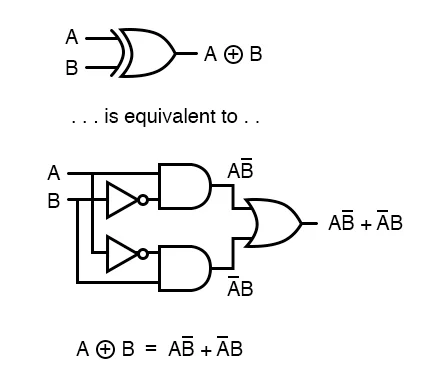

Figura 2: Circuito XOR.

In [ ]:

# resposta:

class XorCircuit:
    def __init__(self):
        self._neuron_and = MCPNeuron(weights= [1, 1], bias= 2)
        self._neuron_not = MCPNeuron(weights = [-1], bias = 0)
        self._neuron_or = MCPNeuron(weights = [1, 1],bias = 1)

    def forward(self, x: list[float]) -> float:
        assert len(x) == 2, 'xor should receive two values as input'
        a, b = x
        notA = self._neuron_not.forward([a])
        notB = self._neuron_not.forward([b])
        andANB = self._neuron_and.forward([a,notB])
        andBNA = self._neuron_and.forward([b,notA])
        orAnds = self._neuron_or.forward([andANB,andBNA])
        return orAnds



In [ ]:
import itertools
import pandas as pd

def truth_table(circuit: MCPCircuit) -> pd.DataFrame:
    combinations = list(itertools.product([0, 1], repeat=2))
    table = [c + (circuit.forward(c), ) for c in combinations]
    return pd.DataFrame(table, columns='a b result'.split())


circuit = XorCircuit()
truth_table(circuit)  # deve exibir a tabela verdade do XOR